# A Movie recommendation system, also known as a movie recommender system uses ml to predict or filter
# users film preferences based on thier prior decision and actions
EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from datetime import datetime
%matplotlib inline


These lines import tools for handling sparse matrices (csr_matrix), date/time operations (datetime), 
and enable inline plotting in Jupyter notebooks (%matplotlib inline).
In a movie recommendation system, if a user hasn’t rated most movies, 
the user-item matrix becomes sparse.

In [2]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
movies.shape

(9742, 3)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


MOVIE GENRE

<BarContainer object of 19 artists>

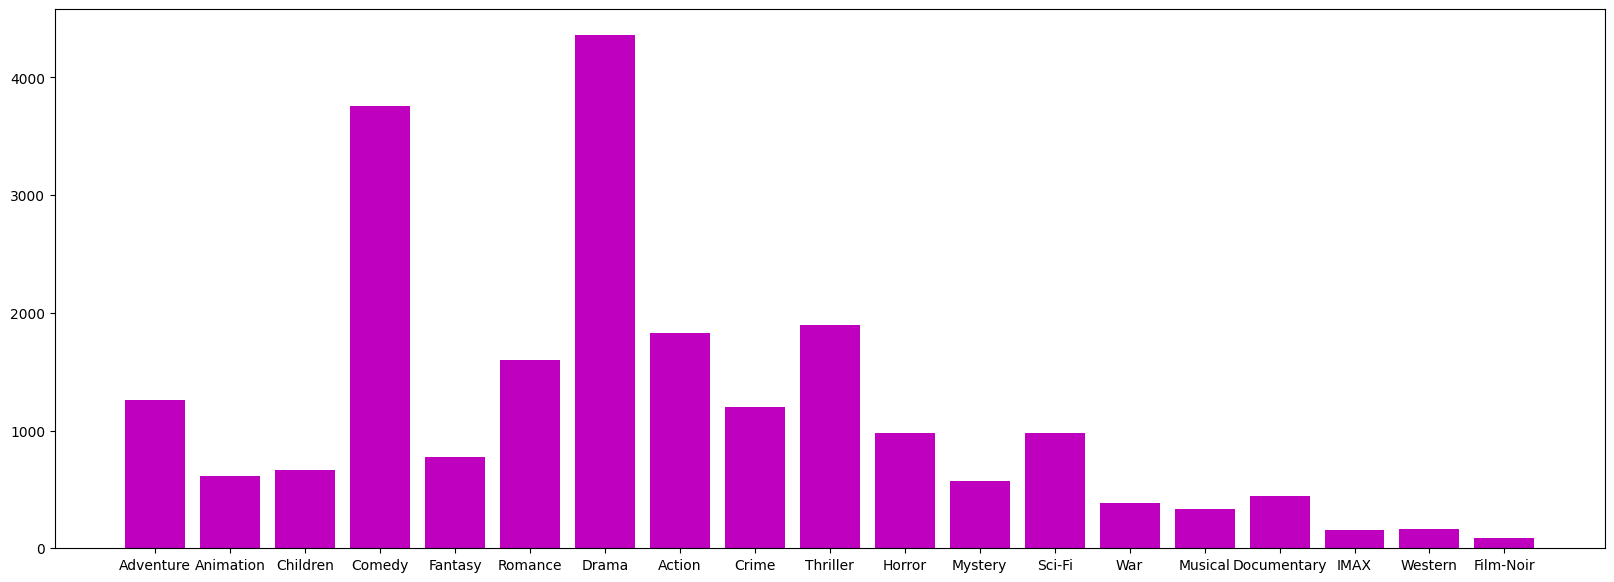

In [9]:
plt.figure(figsize=(20,7))
generlist = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')
#If the genre already exists in the dictionary geners_count, increase its count by 1.
#If it’s the first time the genre appears, add it to the dictionary with value 1.
#Removes the entry "(no genres listed)" if it exists, because it's not a real genre.

Inference

The two genres that are mostly prominent are:

1]Drama
2]Comedy

C:\Users\bhoom\AppData\Local\Temp\ipykernel_30640\485872121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings["rating"]);


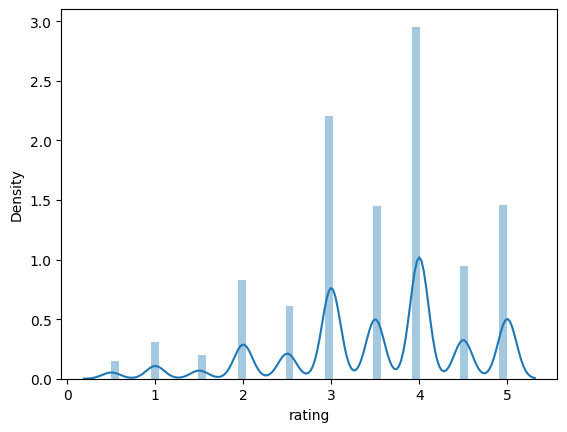

In [10]:
#Distribution of user rating

sns.distplot(ratings["rating"]);

Inference

Rating 4 has been by most user

In [11]:
#Distribution based on year
ratings_df = ratings.copy()
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] =ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())

First 5:


,userId,movieId,rating,timestamp,year,month
66719,429,595,5.0,1996-03-30 00:06:55,1996,3
66716,429,588,5.0,1996-03-30 00:06:55,1996,3
66717,429,590,5.0,1996-03-30 00:06:55,1996,3
66718,429,592,5.0,1996-03-30 00:06:55,1996,3
66712,429,432,3.0,1996-03-30 00:06:55,1996,3


Makes a copy of the ratings Df to work on safely without modifying the orginal.
Converts the timestamp from a Unix time format (like 978300760) into a readable format (YYYY-MM-DD HH:MM:SS) using datetime.fromtimestamp().
year: year of the rating (e.g., 2000)
month: month of the rating (e.g., 12 for December)
Sorts all ratings in chronological order, earliest to latest.
Prints and displays the first 5 rows of the DataFrame to check the changes.


,# of Ratings
year,
1996,6040
1997,1916
1998,507
1999,2439
2000,10061


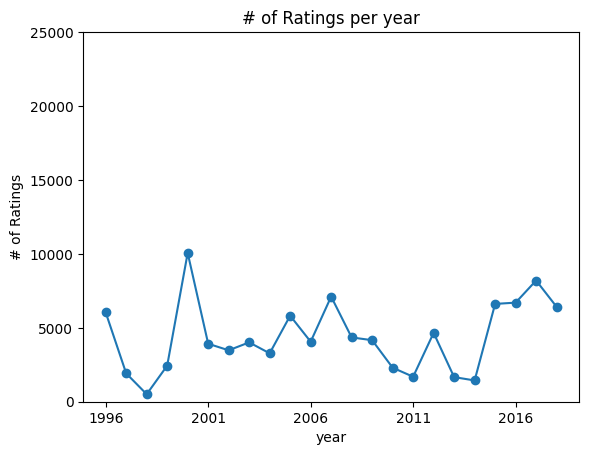

In [12]:
year_counts = ratings_df[['year','rating']].groupby(['year']).count()
year_counts = year_counts.rename(index=str, columns={'rating': '# of Ratings'})
year_counts = year_counts.reset_index()
year_counts = year_counts.set_index('year', drop=True)
display(year_counts[0:5])
year_counts['# of Ratings'].plot(style='o-')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per year')
plt.ylim([0, 25000])
plt.gca().grid(which='minor')
plt.show()


Groups ratings by year and counts how many ratings exist for each year.
Renames the count column to a more readable label # of Ratings.
Resets the index and sets year as the new index for easier plotting.
Shows the first 5 rows of the year-wise ratings count.
Plots the number of ratings per year using dots connected by lines.
Adds y-label, title, sets y-axis limit, adds a minor grid, and displays the plot.


In [13]:
# DATASET SIZE AND ITS VALUES
data = pd.pivot(index = 'movieId', columns = 'userId', data = ratings,values = 'rating')
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Movies become the row labels   #Users become the column headers
#The actual ratings fill the cells of the matrix
#What the data shows:

#Movie 1 was rated 4.0 by user 1, 4.0 by user 5, 4.5 by user 7, etc.
#Movie 2 was rated 4.0 by user 6, 4.0 by user 8, 4.0 by user 602, 5.0 by user 604, etc.
#NaN values indicate that particular user hasn't rated that particular movie

In [15]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(ratings.shape)+"\n Movies DataFrame"+ str(movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [16]:
#MERGING THE 2 DATAFRAMES AND GROUPING THEM BY EITHER ONE TO PLOT GRAPHS
merge_ratings_movies = pd.merge(movies, ratings, on='movieId', how='inner')
merge_ratings_movies.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962


In [17]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp',axis =1)
merge_ratings_movies.shape

(100836, 5)

In [18]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId')['rating'].agg([np.size, np.mean])
print(ratings_grouped_by_users.head(2))

        size      mean
userId                
1        232  4.366379
2         29  3.948276


C:\Users\bhoom\AppData\Local\Temp\ipykernel_30640\1417161026.py:1: FutureWarning: The provided callable <function mean at 0x0000020868218E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ratings_grouped_by_users = merge_ratings_movies.groupby('userId')['rating'].agg([np.size, np.mean])


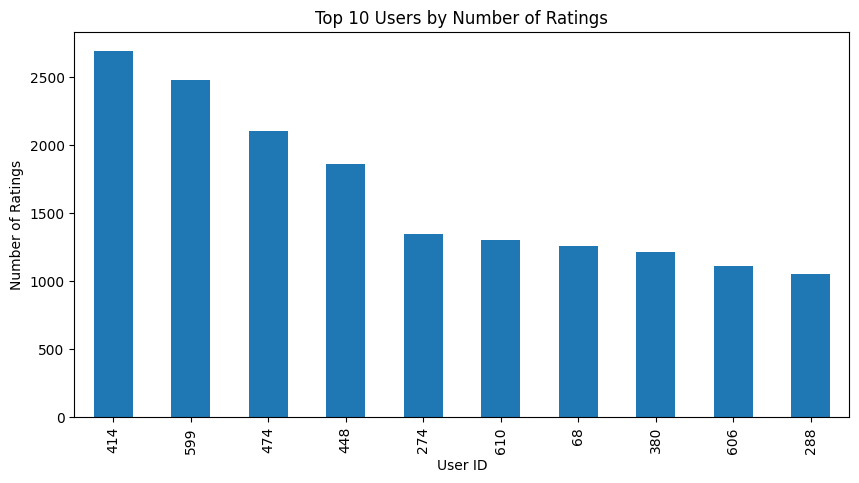

In [21]:
ratings_grouped_by_users['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

In [22]:
#MOVIES WITH HIGH AVERAGE RATING

C:\Users\bhoom\AppData\Local\Temp\ipykernel_30640\3916276397.py:1: FutureWarning: The provided callable <function mean at 0x0000020868218E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId')['rating'].agg([np.mean, np.size])


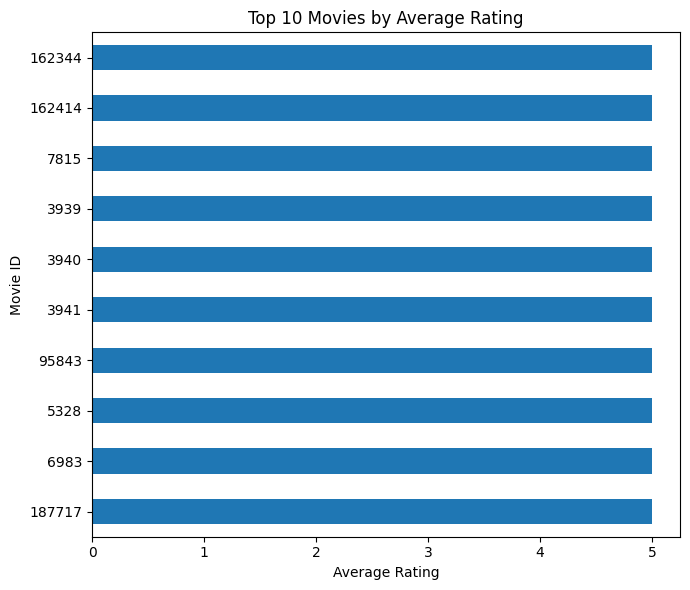

In [25]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId')['rating'].agg([np.mean, np.size])
ratings_grouped_by_movies['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6))
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie ID')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

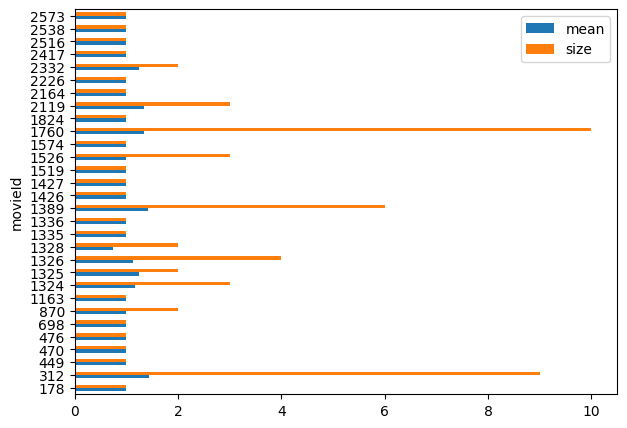

In [27]:
#Movies with low average rating
low_rated_movies_filter = ratings_grouped_by_movies['mean']<1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(30).plot(kind = 'barh', figsize=(7,5));

In [30]:
numberOf_user_voted_for_movie = pd.DataFrame( ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.head()
                                    

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [31]:

numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))
numberOf_movies_voted_by_user.head()

,rating
userId,
1,232
2,29
3,39
4,216
5,44


In [32]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


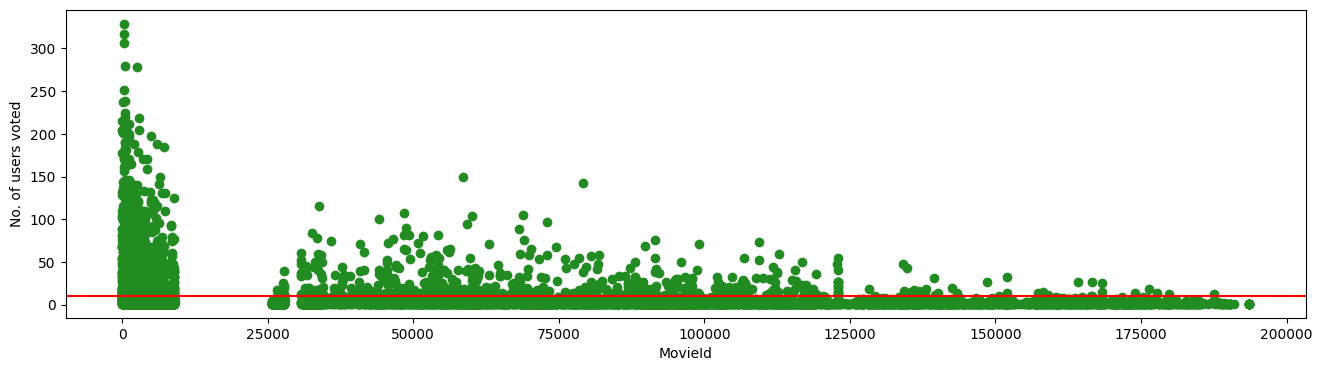

In [33]:
f, ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter( numberOf_user_voted_for_movie.index,  numberOf_user_voted_for_movie, color='forestgreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

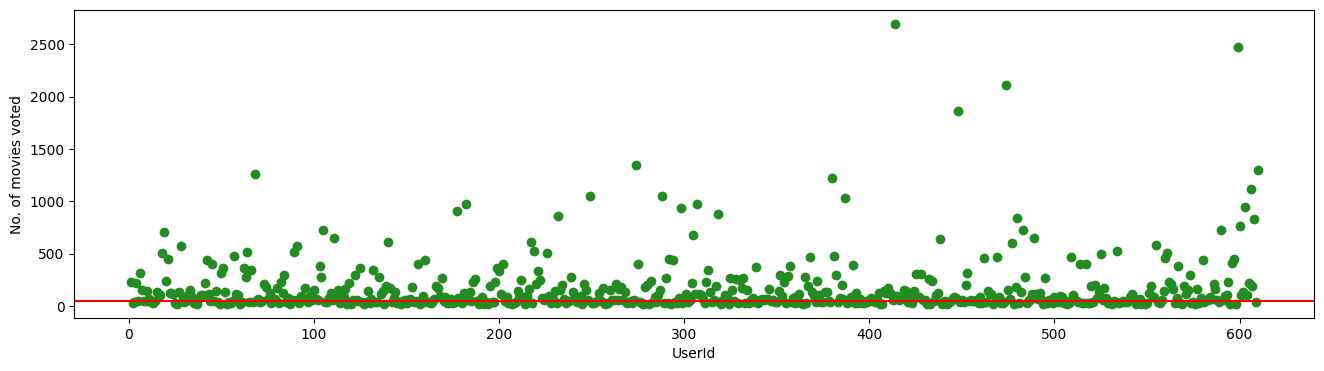

In [34]:
f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(numberOf_movies_voted_by_user.index, numberOf_movies_voted_by_user, color='forestgreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No. of movies voted')
plt.show()

In [35]:
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie > 10].index,:]
data_final = data_final.loc[:, numberOf_movies_voted_by_user[numberOf_movies_voted_by_user >50].index]
data_final.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data_final.shape

(9724, 610)

In [37]:
data.shape

(9724, 610)

In [40]:
#REMOVING SPARSITY

trial_sample = np.array([[0,0,3,0,0], [4,0,0,0,2], [0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(trial_sample) / float(trial_sample.size))
print(sparsity)

0.7333333333333334


In [41]:
csr_sample =csr_matrix(trial_sample)
print(csr_sample)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (3, 5)>
  Coords	Values
  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [42]:

csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)
data_final.head()

userId,movieId,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
2,3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


MODELS

MODEL1 : USER-BASED COLLABORATIVE FILTERING
(Memory based approach)

In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
import re

def clean_title(title):
    #replace any non word or number characters
    title = re.sub("[^a-zA-Z0-9 ]","",title)
    return title

In [45]:
movies["clean_title"]=movies["title"].apply(clean_title)


In [46]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life Zero 2017
9739,193585,Flint (2017),Drama,Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs Dead Apple 2018


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Term Frequency(TF) and Inverse Document Frequency (DF)
#Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is
#unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["clean_title"])

In [49]:
#It measures the angle between two vectors in a multi-dimensional space.
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#search term
def search(title):
    #cleaning the title
    title  = clean_title(title)
    #turn serch term to vector
    query_vec = vectorizer.transform([title])
    #similarity between serach term and titles
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    #5 most similiar titles
    indices = np.argpartition(similarity, -5)[-5:]
    #reverse result(most similiar is in the last)
    #index movie data acoording to indices
    results = movies.iloc[indices].iloc[::-1]
    
    return results
search("Iron man")

,movieId,title,genres,clean_title
6743,59315,Iron Man (2008),Action|Adventure|Sci-Fi,Iron Man 2008
7324,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX,Iron Man 2 2010
8151,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,Iron Man 3 2013
9444,167296,Iron Man (1931),Drama,Iron Man 1931
8142,102007,"Invincible Iron Man, The (2007)",Animation,Invincible Iron Man The 2007


In [51]:
import ipywidgets as widgets
#ets you create interactive user interface controls like sliders and buttons directly in Jupyter notebooks.
from IPython.display import display

movie_input = widgets.Text(
    description = 'Movie Title:',
    disabled = False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        #new value of input
        title = data["new"]
        if len(title) > 5:
            display(search(title))
#call method on type
movie_input.observe(on_type, names='value')


display(movie_input, movie_list)


Text(value='', description='Movie Title:')

Output()

In [55]:
ratings = pd.read_csv('ratings.csv')
#Considering similar users

In [58]:
#users who watched the movieid and greater than 5 rating(liked the same movie
                                                      
similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()

In [60]:
#movies users who are similiar to us liked(other than provided)
similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]

In [61]:

#counts how many times each movie appears in dataset
#convert it to percentage
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
#movies greater than 10 percent liked
similar_user_recs = similar_user_recs[similar_user_recs > .10]

In [63]:
#all the users who have watched the movies in the set and have given it high ratings
all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]

In [64]:
#percentage of all users who liked the movies
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

In [65]:
#dataframe with all and similiar users
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]

In [66]:

#prefer movies with a difference between similar and all
rec_percentages

,similar,all
movieId,,
89745,1.000000,0.045534
79132,0.615385,0.120841
2571,0.615385,0.262697
58559,0.576923,0.138354
112852,0.576923,0.047285
...,...,...
98243,0.115385,0.007005
3996,0.115385,0.073555
106920,0.115385,0.017513


In [67]:

rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [68]:
#sort in descending
#higher the score better the recommendation
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [69]:
#merge to get titles
#left index:movie id
rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")

,similar,all,score,movieId,title,genres,clean_title
8301,0.192308,0.008757,21.961538,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,Day of the Doctor The 2013
8696,0.192308,0.008757,21.961538,122920,Captain America: Civil War (2016),Action|Sci-Fi|Thriller,Captain America Civil War 2016
7850,0.115385,0.005254,21.961538,93721,Jiro Dreams of Sushi (2011),Documentary,Jiro Dreams of Sushi 2011
8469,0.115385,0.005254,21.961538,112623,Dawn of the Planet of the Apes (2014),Sci-Fi,Dawn of the Planet of the Apes 2014
7693,1.000000,0.045534,21.961538,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,Avengers The 2012
8151,0.230769,0.012259,18.824176,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,Iron Man 3 2013
8689,0.192308,0.010508,18.301282,122900,Ant-Man (2015),Action|Adventure|Sci-Fi,AntMan 2015
8451,0.192308,0.010508,18.301282,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation,How to Train Your Dragon 2 2014
8395,0.307692,0.017513,17.569231,110102,Captain America: The Winter Soldier (2014),Action|Adventure|Sci-Fi|IMAX,Captain America The Winter Soldier 2014
8686,0.153846,0.008757,17.569231,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi,Avengers Age of Ultron 2015


In [70]:
def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

In [71]:
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        #title from input widget
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            #highest result in forst row
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()

In [ ]:
#Model 2: KNN BASED COLLABORATIVE FILTERING
#(MODEL BASED APROACH)

In [74]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head(10)

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
5,6,102
6,7,54
7,8,8
8,9,16
9,10,132


In [75]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))     
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head(10)

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
5,6,314
6,7,152
7,8,47
8,9,46
9,10,140


In [76]:
#code
data_final1 = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie['rating'] > 10]['movieId'],:]
data_final1 = data_final1.loc[:,numberOf_movies_voted_by_user[numberOf_movies_voted_by_user['rating'] > 60]['userId']]
data_final1.shape

(2121, 334)

In [83]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer

# Convert sparse matrix to dense format & handle NaNs
csr_data_imputed = SimpleImputer(strategy='mean').fit_transform(csr_data.toarray())

# Fit NearestNeighbors model
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20).fit(csr_data_imputed)

def get_movie_recommendation(movie_name):
    n = 10
    movie_list = movies[movies['title'].str.contains(movie_name, case=False, na=False)]
    if movie_list.empty:
        return "No movies found. Please check your input."

    movie_idx = data_final[data_final['movieId'] == movie_list.iloc[0]['movieId']].index[0]
    distances, indices = knn.kneighbors(csr_data_imputed[movie_idx].reshape(1, -1), n_neighbors=n+1)

    recommendations = [
        (movies.loc[movies['movieId'] == data_final.iloc[i]['movieId'], 'title'].values[0], d)
        for i, d in zip(indices.squeeze()[1:], distances.squeeze()[1:])
    ]

    return pd.DataFrame(recommendations, columns=['Title', 'Distance']).set_index('Distance')



In [84]:
get_movie_recommendation("Toy Story")

,Title
Distance,
0.009619,"Preacher's Wife, The (1996)"
0.009845,Night of the Comet (1984)
0.009866,Vegas Vacation (National Lampoon's Las Vegas V...
0.009919,Deep Impact (1998)
0.009960,Homegrown (1998)
0.010003,"Godfather: Part III, The (1990)"
0.010005,Nashville (1975)
0.010006,Election (1999)
0.010028,Steam: The Turkish Bath (Hamam) (1997)


In [85]:

print("Enter the number of movies you would love to watch from the above list of recommendations")
p=int(input())
print("Enter the no of movies from the above list of recommendations that you would say is irrelevant to your taste")
ir=int(input())

precision=p/10
recall=p/(10-ir)
F_score=(2*precision*recall)/(precision+recall)
print("F_score:",F_score)

Enter the number of movies you would love to watch from the above list of recommendations


 3


Enter the no of movies from the above list of recommendations that you would say is irrelevant to your taste


 4


F_score: 0.37499999999999994
